In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# ANOVA

## **Context:**

**The Health Company, which provides various  diet-plans to  lose weight  conducted  a  market  test experiment to test three different level of diets (A, B, C). Each diet gave a different impact on the weight after following the diet for 6 weeks. Given is the dataset of 78 observations which contains columns of Diet , Pre-weight and weight after 6  weeks. Perform ANOVA on the dataset and interpret the results.**

# Importing the Libraries

# Loading the dataset CSV file

In [2]:
df=pd.read_csv('diet.csv')

# Checking the top 5 records

In [3]:
df.head()

,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


# Checking the shape and information of the dataframe

In [4]:
df.shape

(78, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


# Checking the summary of the dataframe

In [6]:
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


# Checking for missing values

In [7]:
df.isnull().sum()

diet            0
preweight       0
weight6weeks    0
dtype: int64

# Checking distinct values of Diet

In [8]:
df.diet.value_counts()

C    27
B    27
A    24
Name: diet, dtype: int64

# Creating box plots

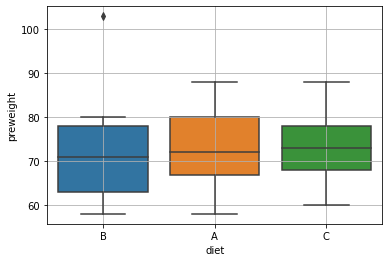

In [9]:
sns.boxplot(x="diet", y="preweight", data = df)
plt.grid()
plt.show()

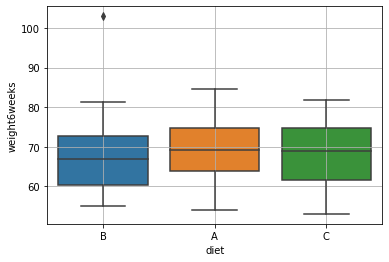

In [10]:
sns.boxplot(x="diet", y="weight6weeks", data=df)
plt.grid()
plt.show()

Looking at above boxplot of preweight and weight6weeks, we can observe that there is a change in the weights

# Formulate the hypothesis of the One-way ANOVA of 'Diet' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category is equal.

$H_a$ : At least one of the means of 'weight6weeks' variable with respect to each diet category is unequal.

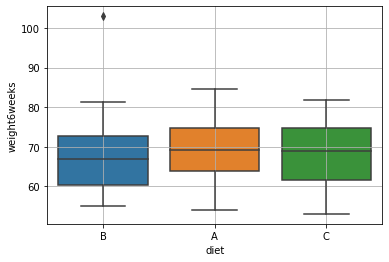

In [11]:
sns.boxplot(x="diet", y="weight6weeks", data=df)
plt.grid()
plt.show()

# One-way ANOVA with the 'Diet' variable.

In [12]:
# perform one-way anova test
test_stat, p_value = stats.f_oneway(df.loc[df['diet'] == 'A', 'weight6weeks'],
                              df.loc[df['diet'] == 'B', 'weight6weeks'],
                              df.loc[df['diet'] == 'C', 'weight6weeks'])
print('The p-value is ', p_value)

The p-value is  0.8328388999845644


Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$). Hence, we have enough statistical significance to conclude that the means of 'weight6weeks' variable with respect to each diet category is equal.